# SIN Stock Trading Game

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter

# Importing defined functions

from Functions import stock_df_create
from Functions import get_current_weights
from Functions import rebalance_portfolio
from Functions import additional_cash_investments
from Functions import create_panel_data
from Functions import rets_plot_report
from Functions import rets_plot
from Functions import weekly_returns_bar_chart
from Functions import performance_metrics

## 1 - Dataframe creation and stock selection

In [2]:
tkr_list = ['BTI', 'BYD', 'MO', 'SAM', 'STZ', 'LMT', 'LVS',
            'TAP', 'TDG', 'PEP', 'NOC', 'MGM', 'GD', 'BUD', 
            'BAESY', 'BDRBF', 'MNST', 'WYNN', 'RRR', 'RTX',
            'PM', 'CZR', 'HO.PA', 'RHM.DE', 'AIR', 'HEI', 'GTBIF',
            'CURLF', 'DKNG']

In [3]:
df = stock_df_create(tkr_list, start_date="2024-03-18", end_date="2024-04-19")
df.sort_values(by="TKR")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE
24,AIR,,2271585792,0.014486,0.001430,63.029999
14,BAESY,,49267138560,-0.005348,-0.037409,65.099998
15,BDRBF,,4047648512,-0.060973,-0.016974,41.119999
0,BTI,,64807063552,-0.009622,-0.072417,28.820000
13,BUD,,115777716224,-0.030470,-0.035798,57.910000
1,BYD,,5998492160,-0.038356,0.012876,62.930000
27,CURLF,,3637080064,-0.042493,-0.017442,5.070000
21,CZR,,8262660096,-0.100426,-0.046447,37.980000
28,DKNG,,19350540288,-0.083627,-0.043199,41.639999
12,GD,,79188090880,-0.007757,0.027630,285.269989


## 2 - Stock Weighting and Portfolio Construnction

### 2.1 Assigning Size and Momentum scores

In [4]:
scaler = MinMaxScaler()

market_cap_values = df['MKT_CAP'].values.reshape(-1, 1)
weekly_return_values = df['W_RET'].values.reshape(-1, 1)
monthly_return_values = df['M_RET'].values.reshape(-1,1)

df['Size_Score'] = scaler.fit_transform(market_cap_values)
df['W_Mom_Score'] = scaler.fit_transform(weekly_return_values)
df['M_Mom_Score'] = scaler.fit_transform(monthly_return_values)

### 2.2 Defining Scores Importance

In [5]:
mkt_cap_weight = 0.3
w_mom_weight = 0.3
m_mom_weight = 0.4

In [6]:
df['Overall_Score'] = (df['Size_Score'] * mkt_cap_weight) + (df['W_Mom_Score'] * w_mom_weight) + (df['M_Mom_Score'] * m_mom_weight)
df.sort_values(by="TKR")

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE,Size_Score,W_Mom_Score,M_Mom_Score,Overall_Score
24,AIR,,2271585792,0.014486,0.001430,63.029999,0.000000,0.934909,0.615733,0.526766
14,BAESY,,49267138560,-0.005348,-0.037409,65.099998,0.198233,0.787174,0.419726,0.463513
15,BDRBF,,4047648512,-0.060973,-0.016974,41.119999,0.007492,0.372830,0.522858,0.323240
0,BTI,,64807063552,-0.009622,-0.072417,28.820000,0.263783,0.755335,0.243055,0.402957
13,BUD,,115777716224,-0.030470,-0.035798,57.910000,0.478784,0.600038,0.427860,0.494791
1,BYD,,5998492160,-0.038356,0.012876,62.930000,0.015721,0.541301,0.673498,0.436506
27,CURLF,,3637080064,-0.042493,-0.017442,5.070000,0.005760,0.510485,0.520495,0.363071
21,CZR,,8262660096,-0.100426,-0.046447,37.980000,0.025271,0.078947,0.374114,0.180911
28,DKNG,,19350540288,-0.083627,-0.043199,41.639999,0.072041,0.204085,0.390510,0.239042
12,GD,,79188090880,-0.007757,0.027630,285.269989,0.324444,0.769230,0.747953,0.627283


### 2.3 Portfolio Construction

In [7]:
df['Weights_new'] = df['Overall_Score'] / df['Overall_Score'].sum()

Optimal_new_weights = df[['TKR', 'Weights_new', 'LAST_PRICE']]
Optimal_new_weights.sort_values(by="TKR")

,TKR,Weights_new,LAST_PRICE
24,AIR,0.040168,63.029999
14,BAESY,0.035345,65.099998
15,BDRBF,0.024649,41.119999
0,BTI,0.030727,28.820000
13,BUD,0.037730,57.910000
1,BYD,0.033286,62.930000
27,CURLF,0.027686,5.070000
21,CZR,0.013795,37.980000
28,DKNG,0.018228,41.639999
12,GD,0.047833,285.269989


### 2.4 Visual Representation

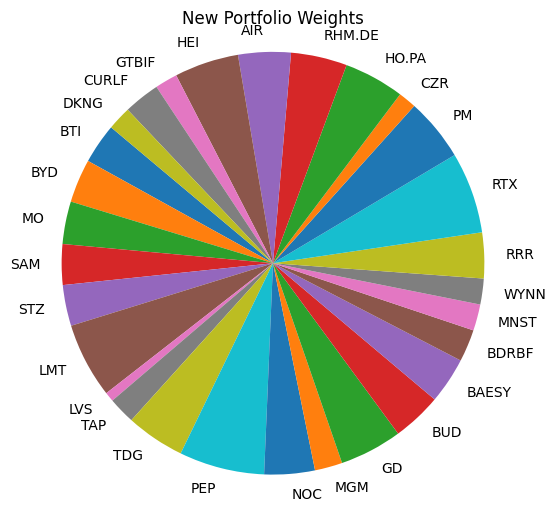

In [8]:
plt.figure(figsize=(6, 6))
plt.pie(Optimal_new_weights['Weights_new'], labels=Optimal_new_weights['TKR'], startangle=140)
plt.title('New Portfolio Weights')
plt.axis('equal') 

plt.show()

## 3 - Portfolio Rebalancing

In [9]:
Cur_port = pd.read_csv("OpenPosition_4_15_2024.csv", header=0)
Cur_port.rename(columns={'Symbol': 'TKR'}, inplace=True)
Cur_port

,TKR,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage
0,AIR,European Aeronautic Defence and Space NV,152,EUR,162.9000,169.509737,0.64,"-1,004.68",24760.800000,-3.90
1,BAESY,BAE Systems plc - ADR,559,USD,67.3000,68.647448,1.04,-707.80,35352.152382,-1.96
2,BDRBF,Bombardier Inc. - Ordinary Shares - Class B (S...,949,USD,41.7400,42.296721,-0.84,-496.47,37222.680587,-1.32
3,BTI,British American Tobacco Plc - ADR,790,USD,28.6050,30.966214,-0.02,"-1,752.88",21235.281957,-7.63
4,BUD,Anheuser-Busch In Bev SA/NV - ADR,528,USD,58.3100,60.371988,-0.36,"-1,023.08",28931.167013,-3.42
5,BYD,Boyd Gaming Corp.,364,USD,65.2118,64.415730,0.81,272.30,22305.736114,1.24
6,CURLF,Curaleaf Holdings Inc,13383,USD,4.7500,5.285331,-0.08,"-6,732.32",59735.991430,-10.13
7,CZR,Caesars Entertainment Inc,485,USD,40.7700,41.159564,0.67,-177.55,18581.100764,-0.95
8,DKNG,DraftKings Inc - Ordinary Shares - Class A,1122,USD,44.5200,46.393915,0.30,"-1,975.75",46939.342398,-4.04
9,GD,General Dynamics Corp.,194,USD,288.1350,285.352439,0.27,507.27,52527.500305,0.98


In [10]:
Cur_weights = get_current_weights(Cur_port)
Cur_weights = pd.DataFrame(Cur_weights.items(), columns=['TKR', 'Weights_cur'])
Cur_weights.loc[Cur_weights['TKR'] == 'HO', 'TKR'] = 'HO.PA'
Cur_weights.loc[Cur_weights['TKR'] == 'RHM', 'TKR'] = 'RHM.DE'
Cur_weights

,TKR,Weights_cur
0,AIR,0.024103
1,BAESY,0.036621
2,BDRBF,0.038559
3,BTI,0.021997
4,BUD,0.029970
5,BYD,0.023106
6,CURLF,0.061880
7,CZR,0.019248
8,DKNG,0.048624
9,GD,0.054413


In [11]:
trades, num_trades, traded_amount = rebalance_portfolio(Cur_weights, Optimal_new_weights, Cur_port)
print(f'To rebalace the portfolio {num_trades} trades will be needed, and a cash amount of {traded_amount} is necessary.')

To rebalace the portfolio 18 trades will be needed, and a cash amount of -104441.56080557266 is necessary.


In [12]:
trades

,TKR,Weights_cur,Weights_new,LAST_PRICE,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage,DollarAmount,DollarAmount_cur,DollarAmount_new,DollarAmount_diff,Shares_to_trade
0,AIR,0.024103,0.040168,63.029999,European Aeronautic Defence and Space NV,152.0,EUR,162.900,169.509737,0.64,"-1,004.68",24760.800000,-3.90,24760.800,24760.800,36630.915197,11870.115197,73.0
2,BDRBF,0.038559,0.024649,41.119999,Bombardier Inc. - Ordinary Shares - Class B (S...,949.0,USD,41.740,42.296721,-0.84,-496.47,37222.680587,-1.32,39611.260,39611.260,22477.846836,-17133.413164,-410.0
6,CURLF,0.061880,0.027686,5.070000,Curaleaf Holdings Inc,13383.0,USD,4.750,5.285331,-0.08,"-6,732.32",59735.991430,-10.13,63569.250,63569.250,25247.698959,-38321.551041,-8068.0
8,DKNG,0.048624,0.018228,41.639999,DraftKings Inc - Ordinary Shares - Class A,1122.0,USD,44.520,46.393915,0.30,"-1,975.75",46939.342398,-4.04,49951.440,49951.440,16622.798188,-33328.641812,-749.0
9,GD,0.054413,0.047833,285.269989,General Dynamics Corp.,194.0,USD,288.135,285.352439,0.27,507.27,52527.500305,0.98,55898.190,55898.190,43620.815236,-12277.374764,-43.0
10,GTBIF,0.026471,0.017243,12.930000,Green Thumb Industries Inc - Ordinary Shares (...,2193.0,USD,12.400,13.332936,-0.35,"-1,922.56",25553.436011,-7.00,27193.200,27193.200,15724.742367,-11468.457633,-925.0
11,HEI,0.020473,0.049188,196.660004,Heineken NV,239.0,EUR,88.000,85.376904,0.18,626.92,21032.000000,3.07,21032.000,21032.000,44856.509601,23824.509601,271.0
14,LVS,0.028435,0.007224,45.880001,Las Vegas Sands Corp,573.0,USD,50.980,51.083316,0.55,-55.63,27450.069068,-0.20,29211.540,29211.540,6587.450576,-22624.089424,-444.0
15,MGM,0.028678,0.021089,42.040001,MGM Resorts International,683.0,USD,43.135,44.202388,0.66,-685.07,27684.679140,-2.41,29461.205,29461.205,19232.135536,-10229.069464,-237.0
16,MNST,0.007505,0.020116,53.459999,Monster Beverage Corp.,141.0,USD,54.680,60.582893,-0.33,-782.12,7244.970259,-9.74,7709.880,7709.880,18344.390153,10634.510153,194.0


In [13]:
trades[['TKR', 'Shares_to_trade']]

,TKR,Shares_to_trade
0,AIR,73.0
2,BDRBF,-410.0
6,CURLF,-8068.0
8,DKNG,-749.0
9,GD,-43.0
10,GTBIF,-925.0
11,HEI,271.0
14,LVS,-444.0
15,MGM,-237.0
16,MNST,194.0


In [14]:
merged_port = pd.merge(Cur_port, trades[['TKR', 'Shares_to_trade']], on='TKR', how='left')
merged_port['Shares_to_trade'].fillna(0, inplace=True)
merged_port['New_Quantity'] = merged_port['Quantity'] + merged_port['Shares_to_trade']

updated_portfolio = merged_port[['TKR', 'New_Quantity', 'LastPrice']]
updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()

updated_portfolio

/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_2439/2842246680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_2439/2842246680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()


,TKR,New_Quantity,LastPrice,DollarAmount,uptd_Weights
0,AIR,225.0,162.9000,36652.5000,0.039723
1,BAESY,559.0,67.3000,37620.7000,0.040772
2,BDRBF,539.0,41.7400,22497.8600,0.024382
3,BTI,790.0,28.6050,22597.9500,0.024491
4,BUD,528.0,58.3100,30787.6800,0.033367
5,BYD,364.0,65.2118,23737.0952,0.025725
6,CURLF,5315.0,4.7500,25246.2500,0.027361
7,CZR,485.0,40.7700,19773.4500,0.021430
8,DKNG,373.0,44.5200,16605.9600,0.017997
9,GD,151.0,288.1350,43508.3850,0.047153


In [15]:
cash_rebalacing = additional_cash_investments(updated_portfolio, 95000)
cash_rebalacing

,TKR,Additional_Shares
0,AIR,23.0
1,BAESY,57.0
2,BDRBF,55.0
3,BTI,81.0
4,BUD,54.0
5,BYD,37.0
6,CURLF,547.0
7,CZR,49.0
8,DKNG,38.0
9,GD,15.0


### 3.1 - Rebalancing Drift

In [16]:
merged_df = pd.merge(Optimal_new_weights, updated_portfolio, on='TKR', suffixes=('_optimal', '_updated'))

mean_difference = np.mean(merged_df['Weights_new'] - merged_df['uptd_Weights'])

print(mean_difference)

0.0013332086714542626


A rebalancing drift of 0.058% is neglectable in the context of our portfolio management, indicating only a minor deviation from the target allocation. By implementing a weekly rebalancing strategy, we ensure that the portfolio weights remain consistently close to the desired allocation. While some minor rebalancing drift is inevitable due to market fluctuations, the frequency of rebalancing helps mitigate the impact of these deviations over time. 

Rebalancing Drifts data:

* 1st week: 0.058%
* 2nd week: 0.017%
* 3rd week: 0.005%
* 4th week: 0.069%

### 3.1 - Rebalancing Visualization

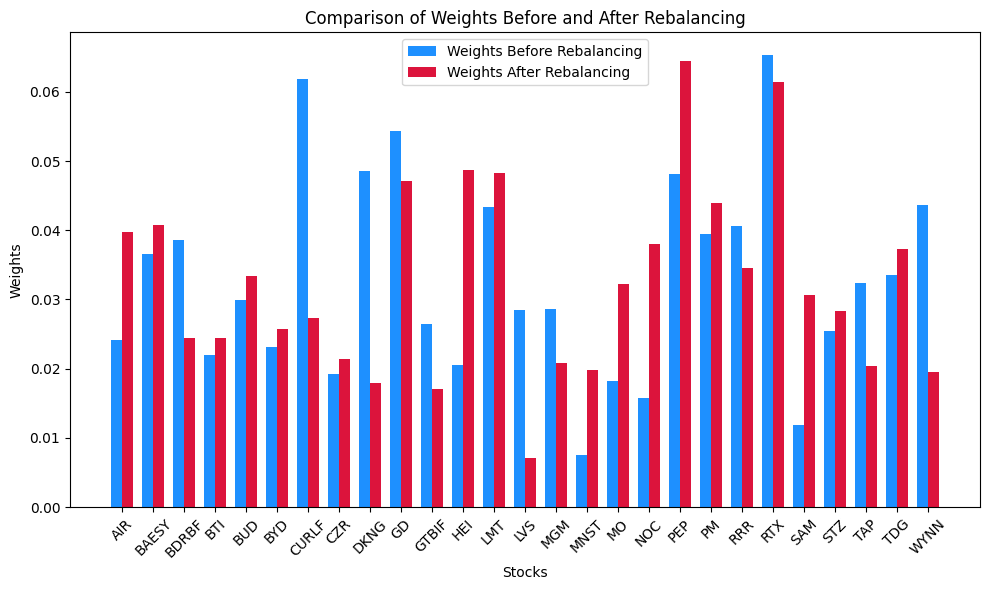

In [17]:
merged_weights = pd.merge(Cur_weights, updated_portfolio, on="TKR")

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(merged_weights))
tick_labels = merged_weights['TKR']

plt.bar(index, merged_weights['Weights_cur'], color='dodgerblue', width=bar_width, label='Weights Before Rebalancing')

plt.bar(index + bar_width, merged_weights['uptd_Weights'], color='crimson', width=bar_width, label='Weights After Rebalancing')

plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Comparison of Weights Before and After Rebalancing')
plt.xticks(index + bar_width / 2, tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

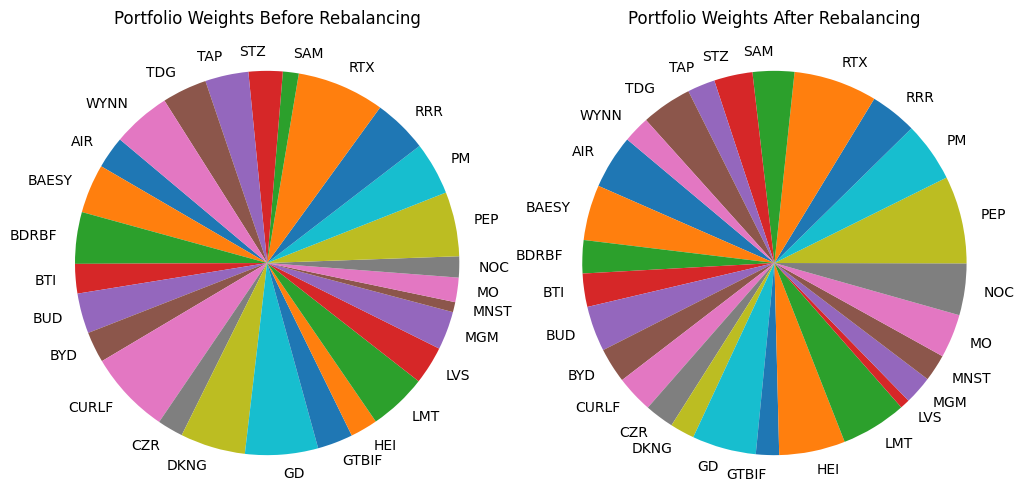

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(merged_weights['Weights_cur'], labels=merged_weights['TKR'], startangle=140)
axs[0].set_title('Portfolio Weights Before Rebalancing')
axs[0].axis('equal')

axs[1].pie(merged_weights['uptd_Weights'], labels=merged_weights['TKR'], startangle=140)
axs[1].set_title('Portfolio Weights After Rebalancing')
axs[1].axis('equal')

plt.show()

## 4 - Performance Evaluation

### 4.1 Data

In [19]:
Benchmark = yf.download("VICEX", start="2024-03-18", end="2024-04-20") 
Benchmark['Benchmark_RET'] = Benchmark['Adj Close'].pct_change()
Benchmark = pd.DataFrame(Benchmark['Benchmark_RET'])

[*********************100%%**********************]  1 of 1 completed


In [20]:
stock_df = create_panel_data(tkr_list, start_date="2024-03-18", end_date="2024-04-19")
stock_df = stock_df[['Adj Close', 'Ticker']]
exchange_rate_data = yf.download('USDEUR=X', start="2024-03-18", end="2024-04-19")
exchange_rate_data = pd.DataFrame(exchange_rate_data['Adj Close'])
exchange_rate_data = exchange_rate_data.rename(columns={'Adj Close': 'USDEUR'})

exchange_rate_data.reset_index(inplace=True)
merged_df = pd.merge(stock_df, exchange_rate_data, on='Date', how='left')
merged_df = merged_df.sort_values(['Ticker', 'Date'])
merged_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,Adj Close,Ticker,USDEUR
550,2024-03-18,62.939999,AIR,0.91890
551,2024-03-19,63.099998,AIR,0.91963
552,2024-03-20,64.349998,AIR,0.92053
553,2024-03-21,63.919998,AIR,0.91431
554,2024-03-22,60.119999,AIR,0.92061
...,...,...,...,...
409,2024-04-12,101.180000,WYNN,0.93224
410,2024-04-15,99.440002,WYNN,0.93900
411,2024-04-16,99.349998,WYNN,0.94111
412,2024-04-17,97.480003,WYNN,0.94149


In [21]:
daily_data = pd.read_csv("daily_positions.csv", header=0)
daily_data['Date'] = pd.to_datetime(daily_data['Date'], format='%d/%m/%Y')
daily_data = daily_data.sort_values(by= ['Symbol', 'Date'])
daily_data = daily_data[['Date', 'Symbol', 'Quantity', 'Currency']]
daily_data.rename(columns={'Symbol': 'Ticker'}, inplace=True)
daily_data.loc[daily_data['Ticker'] == 'HO', 'Ticker'] = 'HO.PA'
daily_data.loc[daily_data['Ticker'] == 'RHM', 'Ticker'] = 'RHM.DE'
daily_data

,Date,Ticker,Quantity,Currency
0,2024-03-18,AIR,400,EUR
29,2024-03-19,AIR,400,EUR
58,2024-03-20,AIR,400,EUR
87,2024-03-21,AIR,400,EUR
116,2024-03-22,AIR,400,EUR
...,...,...,...,...
608,2024-04-15,WYNN,268,USD
637,2024-04-16,WYNN,268,USD
666,2024-04-17,WYNN,268,USD
695,2024-04-18,WYNN,268,USD


In [22]:
final_df = pd.merge(daily_data, merged_df, on=['Date', 'Ticker'], how='inner')
final_df

,Date,Ticker,Quantity,Currency,Adj Close,USDEUR
0,2024-03-18,AIR,400,EUR,62.939999,0.91890
1,2024-03-19,AIR,400,EUR,63.099998,0.91963
2,2024-03-20,AIR,400,EUR,64.349998,0.92053
3,2024-03-21,AIR,400,EUR,63.919998,0.91431
4,2024-03-22,AIR,400,EUR,60.119999,0.92061
...,...,...,...,...,...,...
660,2024-04-12,WYNN,446,USD,101.180000,0.93224
661,2024-04-15,WYNN,268,USD,99.440002,0.93900
662,2024-04-16,WYNN,268,USD,99.349998,0.94111
663,2024-04-17,WYNN,268,USD,97.480003,0.94149


In [23]:
sp500_data = yf.download('^GSPC', start='2024-03-18', end='2024-04-20')
sp500_data = pd.DataFrame(sp500_data['Adj Close'])
sp500_data['SP500_RET'] = sp500_data['Adj Close'].pct_change()
sp500_data =  sp500_data.drop(columns='Adj Close')
sp500_data.reset_index(inplace=True)
sp500_data

[*********************100%%**********************]  1 of 1 completed


,Date,SP500_RET
0,2024-03-18,NaN
1,2024-03-19,0.005649
2,2024-03-20,0.008904
3,2024-03-21,0.003237
4,2024-03-22,-0.001402
5,2024-03-25,-0.003055
6,2024-03-26,-0.002800
7,2024-03-27,0.008631
8,2024-03-28,0.001116
9,2024-04-01,-0.002014


In [24]:
swda = yf.download('SWDA.MI', start='2024-03-18', end='2024-04-20')
swda = pd.DataFrame(swda['Adj Close'])
swda['SWDA_RET'] = swda['Adj Close'].pct_change()
swda =  swda.drop(columns='Adj Close')
swda.reset_index(inplace=True)
swda

[*********************100%%**********************]  1 of 1 completed


,Date,SWDA_RET
0,2024-03-18,NaN
1,2024-03-19,0.001790
2,2024-03-20,0.002122
3,2024-03-21,0.014265
4,2024-03-22,-0.000220
5,2024-03-25,-0.003077
6,2024-03-26,0.002205
7,2024-03-27,-0.000550
8,2024-03-28,0.006383
9,2024-04-02,-0.008093


In [25]:
portfolio_df = pd.read_csv('portfolio.csv', header=0)
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'], format='%d/%m/%Y')
portfolio_df = pd.merge(portfolio_df, exchange_rate_data, on='Date')
portfolio_df['Value_EUR']= (portfolio_df['Cash Amount']+portfolio_df['Total Market Value of All Positions'])
portfolio_df['Value_USD'] = portfolio_df['Value_EUR']/portfolio_df['USDEUR']
portfolio_df['Daily_RET'] = portfolio_df['Value_USD'].pct_change()
portfolio_df['Daily_RET_EUR'] = (portfolio_df['Cash Amount']+portfolio_df['Total Market Value of All Positions']).pct_change()
portfolio_df = pd.merge(portfolio_df, Benchmark, on='Date')
portfolio_df = pd.merge(portfolio_df, sp500_data, on='Date')
portfolio_df = pd.merge(portfolio_df, swda, on='Date')
portfolio_df.set_index('Date', inplace=True)
portfolio_df = portfolio_df['2024-03-19':]
portfolio_df

,Cash Amount,Currency,Total Market Value of All Positions,USDEUR,Value_EUR,Value_USD,Daily_RET,Daily_RET_EUR,Benchmark_RET,SP500_RET,SWDA_RET
Date,,,,,,,,,,,
2024-03-19,172709.04,Eur,830875.37,0.91963,1003584.41,1.091292e+06,0.002788,0.003584,0.004276,0.005649,0.001790
2024-03-20,49142.44,Eur,953375.18,0.92053,1002517.62,1.089066e+06,-0.002040,-0.001063,0.007096,0.008904,0.002122
2024-03-21,49779.47,Eur,966139.03,0.91431,1015918.50,1.111131e+06,0.020261,0.013367,0.003758,0.003237,0.014265
2024-03-22,50564.47,Eur,969152.32,0.92061,1019716.79,1.107653e+06,-0.003130,0.003739,-0.003276,-0.001402,-0.000220
2024-03-25,50564.47,Eur,965072.28,0.92528,1015636.75,1.097653e+06,-0.009028,-0.004001,0.002817,-0.003055,-0.003077
2024-03-26,26516.80,Eur,998000.11,0.92266,1024516.91,1.110395e+06,0.011608,0.008743,0.006086,-0.002800,0.002205
2024-03-27,26516.80,Eur,1006272.12,0.92316,1032788.92,1.118754e+06,0.007528,0.008074,0.000465,0.008631,-0.000550
2024-03-28,26516.80,Eur,1007406.30,0.92478,1033923.10,1.118021e+06,-0.000656,0.001098,-0.000465,0.001116,0.006383
2024-04-02,30389.32,Eur,998588.32,0.93134,1028977.64,1.104836e+06,-0.013129,-0.008027,0.000000,-0.007239,-0.008093


### 4.2 Graphs

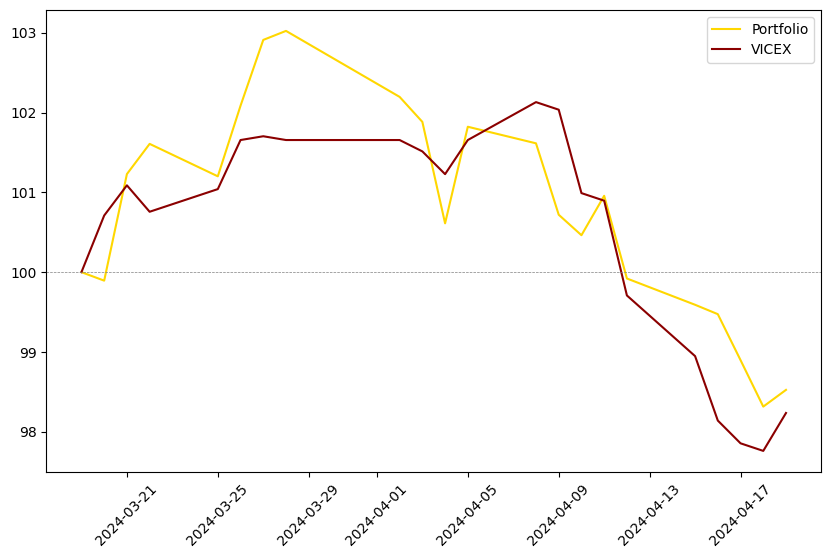

In [26]:
rets_plot_report(portfolio_df['Daily_RET_EUR'], portfolio_df['Benchmark_RET'])

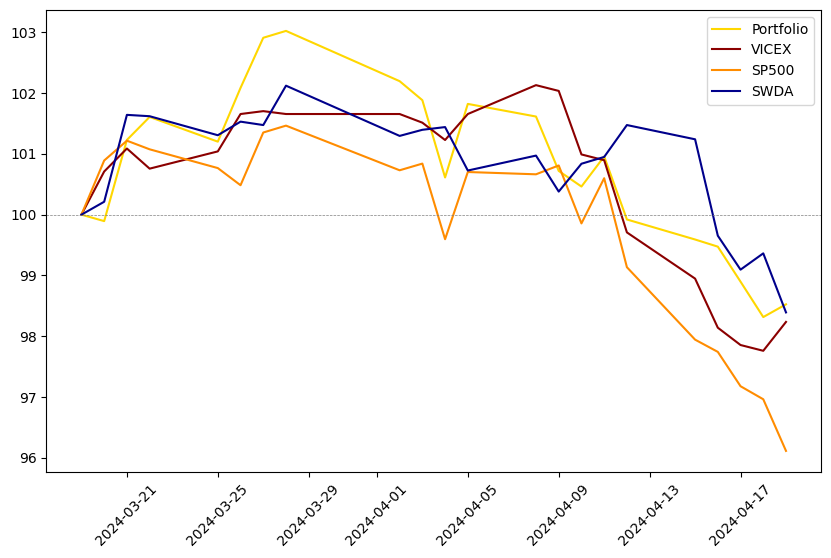

In [27]:
rets_plot(portfolio_df['Daily_RET_EUR'], portfolio_df['Benchmark_RET'], portfolio_df['SP500_RET'], portfolio_df['SWDA_RET'])

<Figure size 1000x600 with 0 Axes>

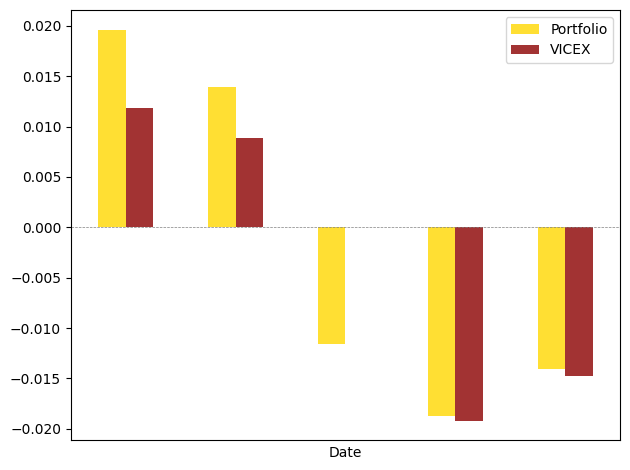

In [28]:
weekly_returns_bar_chart(portfolio_df['Daily_RET_EUR'], portfolio_df['Benchmark_RET'])

### 4.3 Performance Metrics

Assuming the U.S. 3-months T-bill rate as the rf corresponding to 5.23%

In [30]:
performance_metrics(portfolio_df['Value_EUR'] ,portfolio_df['Daily_RET_EUR'], portfolio_df['Benchmark_RET'], risk_free_rate=0.03855)

,0,1
Total Return,-0.007985,-0.007985
Average Daily Return,-0.000489,-0.000489
Standard Deviation,0.007027,0.007027
Sharpe Ratio,-6.621873,-6.621873
Total Outperformance,0.002479,0.002479
Average Daily Outperformance,0.000113,0.000113
Tracking Error,0.006377,0.006377
Information Ratio,0.01767,0.01767
Correlation Coefficient,0.492655,0.492655
Best Day,2024-03-21 00:00:00,0.013367


**Notes:**

* Sharpe Ratio: $\frac{R_{p} - r_{f}}{\sigma_{p}}$ 

* Tracking Error: $\sigma_{p} - \sigma_{b}$

* Information Ratio: $\frac{R_{p}-R_{b}}{TE}$

* M2 = $SR \cdot \sigma_{b} + r_{f}$ 

* $r_{f}$: April [EURIBOR](https://www.euribor-rates.eu/en/) =  0.03855 